### Transformata Hougha w przestrzeni ab - Domowe
Przestrzeń ρ,θ nie jest jedyną przestrzenią w której punkt odpowiada parametrom prostej. Np. można spróbować wykorzystać tradycyjne równanie prostej:

y=ax+b

W tej przestrzeni reprezentacją pęku prostych jest prosta. 

Zadanie: napisać funkcję, która jako argument przyjmuje obraz (binarny) oraz parametry:

- aMin - minimalna wartość parametru a
- aMax - maksymalna  wartość parametru a
- aSkok - skok parametru a
- bMin - minimalna wartość parametru b
- bMax  - maksymalna  wartość parametru b
- bSkok - skok parametru b
Jako wynik ma zwrócić macierz przestrzeni Hougha ab.

Uwagi:

- zadanie może wyglądać na skomplikowane ale tak na prawdę wymaga tylko starannego przemyślenia
- najważniejszy jest problem "adresowania" macierzy H. Można do tego wykorzystać dwa wektory A i B ze wszystkimi możliwymi wartościami jakie parametry a i b mogę przyjąć (w podanych zakresach z podanym skokiem). Wówczas indeksy tych wektorów będą współrzędnymi w macierzy H. Do stworzenia wektorów wykorzystaj funkcję _np.arange_
- na podstawie rozmiaru wektorów A i B (własność _shape_) należy stworzyć wyzerowaną macierz H (funkcja _np.zeros_) 
- dla każdego punktu krawędzi na obrazie należy:
    - używająć wektora A dla każdej z jego wartości a obliczyć odpowiednią wartość b - indeksy kolejnych wartości a (a_idx) będą jedną z współrzędnych macierzy H, natomiast drugą współrędną mozna uzyskać jako b_idx = np.argmin(abs(B - b)).
        - każde a_idx i b_idx wyznaczą punkt w macierzy H, który należy zinkrementować
- działanie funkcji należy przetestować na punktach generowanych w 'edytorku' z punktu "Transformacja Hougha dla małej liczby punktów". Proponowane parametry funkcji:
    - aMin: -5
    - aMax:  5
    - aSkok: 0.05 
    - bMin: -100
    - bMax:  100
    - bSkok: 1

Zastanów się w przypadku jakich prostych reprezentacja ab nie sprawdzi się.

In [84]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [85]:
def Hough_trans_ab(binary,aMin,aMax,aSkok,bMin,bMax,bSkok):
    B = np.arange(bMin,bMax,bSkok)
    A = np.arange(aMin,aMax,aSkok)
    H = np.zeros((B.shape[0],A.shape[0]))
    bin_x, bin_y = binary.shape
    for i in range(bin_x):
        for j in range(bin_y):
            if (binary[i,j] == 1):
                for a_index in range(len(A)):
                    a_idx = a_index
                    b = i-A[a_index]*j
                    b_idx = np.argmin(abs(B-b))
                    H[b_idx,a_idx] +=1
    return H

In [86]:
def show_hough(h,image):
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    ax = axes.ravel()

    ax[0].imshow(image, 'gray')
    ax[0].set_title('Obraz oryginalny')
    ax[0].set_axis_off()
    
    ax[1].imshow(h, 'gray')
    ax[1].set_title('Obraz po transformaty Hougha w przestrzeni ab')
    
    plt.tight_layout()
    plt.show()    

In [87]:
aMin = -5
aMax = 5
aSkok = 0.05
bMin = -100
bMax = 100
bSkok = 1

In [88]:
im1 = np.zeros((100,100))
im2 = np.zeros((100,100))
im3 = np.zeros((100,100))
im4 = np.zeros((100,100))

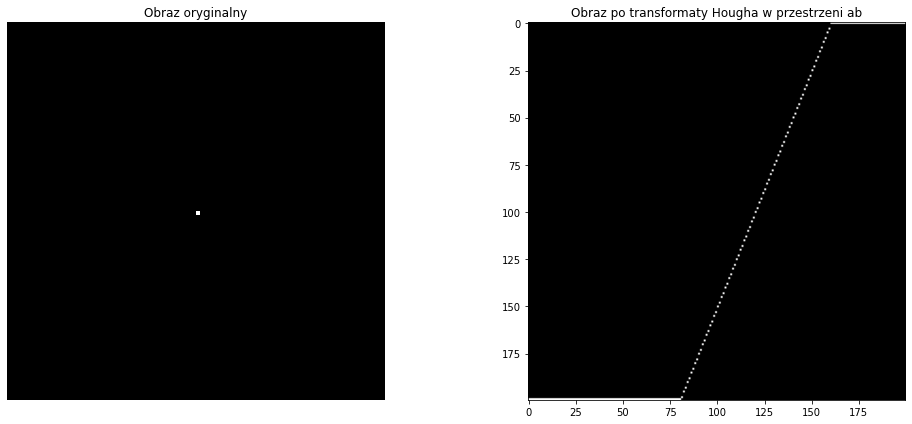

In [89]:
im1[50,50] = 1
Hough_3punkty = Hough_trans_ab(im,aMin,aMax,aSkok,bMin,bMax,bSkok)
show_hough(Hough_3punkty,im)

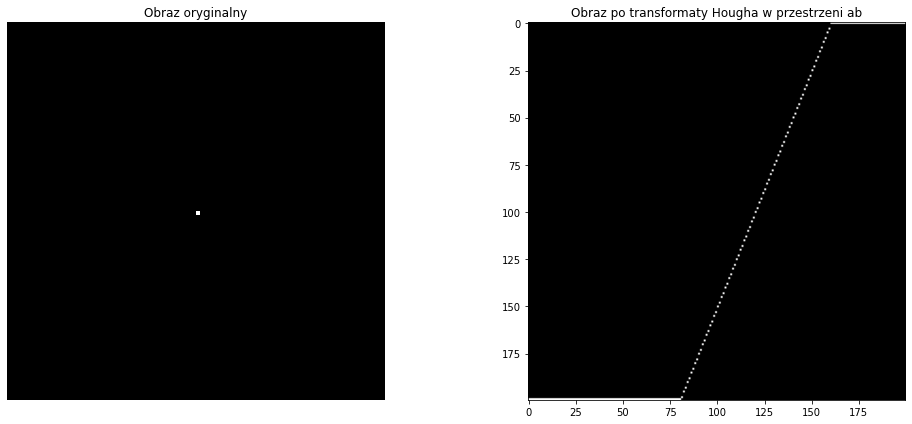

In [90]:
im2[80,20] = 1
im2[40,30] = 1
im2[60,60] = 1
Hough_3punkty = Hough_trans_ab(im,aMin,aMax,aSkok,bMin,bMax,bSkok)
show_hough(Hough_3punkty,im)

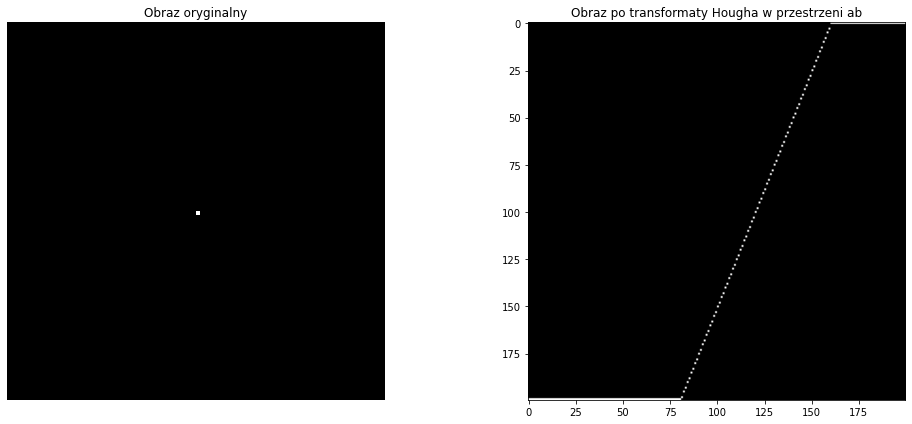

In [91]:
im3[50,50] = 1
im3[40,50] = 1
im3[30,50] = 1
im3[10,50] = 1
im3[10,50] = 1
im3[0,50] = 1
Hough_ten_sam_x = Hough_trans_ab(im,aMin,aMax,aSkok,bMin,bMax,bSkok)
show_hough(Hough_ten_sam_x,im)

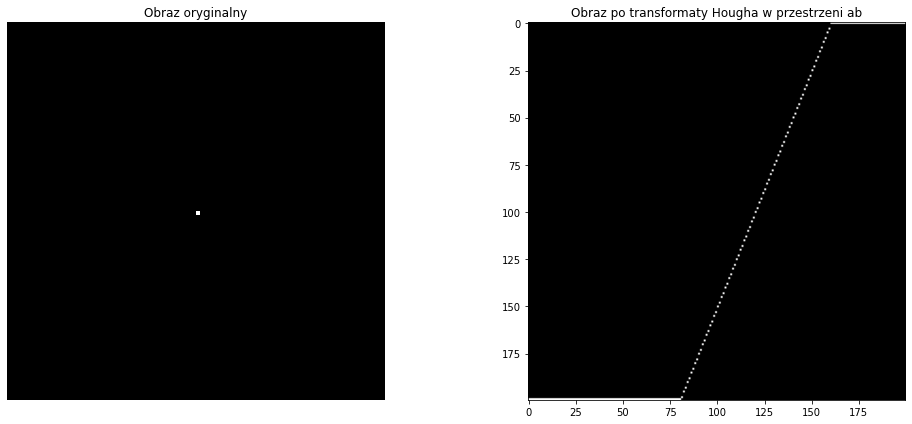

In [92]:
im4[50,50] = 1
im4[50,40] = 1
im4[50,30] = 1
im4[50,20] = 1
im4[50,10] = 1
im4[50,0] = 1
Hough_ten_sam_y = Hough_trans_ab(im,aMin,aMax,aSkok,bMin,bMax,bSkok)
show_hough(Hough_ten_sam_y,im)

Jak widać funkcja działa dla wszystkich rodzajów punktów oprócz punktów pionowych, w których niemożliwe jest zrobienie prostej przez co nie pojawiają się maksima.